In [86]:
# [batch_size=32,224,224,3]
# or
# [batch_size,width,height,color_channels]=shape
# softmax(multi),binarycrossEntroy,categoricalcrossentropy,

In [2]:
from sklearn.datasets import make_circles
n_samples = 1000
X,y=make_circles(
                 n_samples=n_samples,
                 noise=0.03,
                 random_state=42
                 )


In [3]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [88]:
import pandas as pd
circles = pd.DataFrame({'X0':X[:,0],'X1':X[:,1],'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


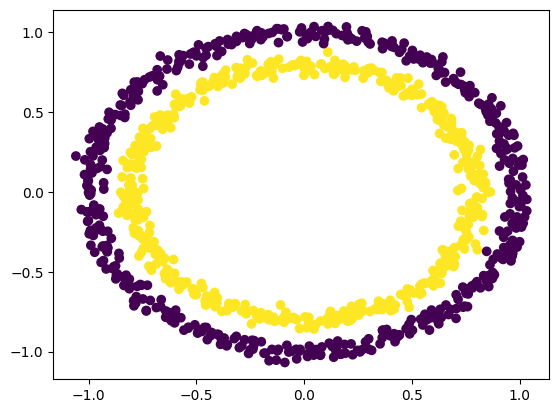

In [89]:
#  Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y);

In [90]:
X.shape,y.shape

((1000, 2), (1000,))

In [91]:
import tensorflow as tf
model=tf.keras.Sequential([
    # tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)
# X=tf.squeeze(X)
# X[0],y[0]
# y=tf.expand_dims(y,axis=0)
# model.fit(X,y,epochs=10)
X,y
model.fit(X,y,epochs=200)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4870 - loss: 2.5803
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5020 - loss: 0.7138
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4870 - loss: 0.6969
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4630 - loss: 0.6978
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4720 - loss: 0.6971
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4980 - loss: 0.6971
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4930 - loss: 0.7027
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 0.6967
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4760 - loss: 0.6964
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4720 - loss: 0.7010
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4530 - loss: 0.7015
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [92]:
model.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4120 - loss: 0.6940


[0.6939791440963745, 0.41200000047683716]

In [93]:
y_pred=model.predict(X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_32256\2284232086.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


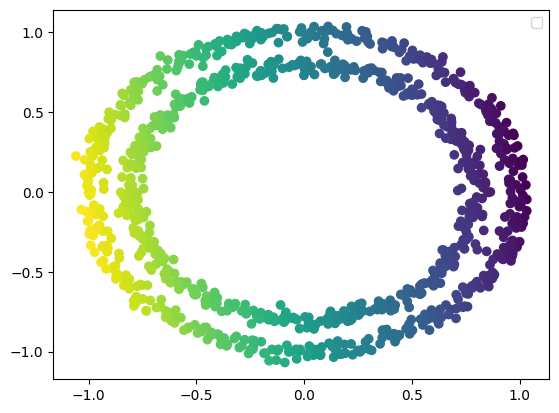

In [94]:
plt.scatter(X[:,0],X[:,1],c=y_pred)
# plt.scatter(X[:,0],X[:,1],c=y)
plt.legend();

In [95]:
# Take in a trained model, features(X) and labels
# create a meshgrid of the different X values
import numpy as np
# Make prediction across the meshgrid
# plot the prediction as well as line between zones(where each unique class falls)

In [104]:
import numpy as np
def plot_desicion_boundry(model,X,y):
    x_min, x_max=X[:,0].min()-0.1,X[:,0]+0.1
    y_min, y_max=X[:,1].min()-0.1,X[:,1]+0.1
    xx, yy=np.meshgrid(np.linspace(x_min,x_max,10),np.linspace(y_min,y_max,10))
    x_in=np.c_[xx.ravel(),yy.ravel()]
    y_pred=model.predict(x_in)

    if len(y_pred[0])>1:
        print('doing multiclass classification')
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)

    else:
        print('doing binary classification')
        y_pred=np.round(y_pred).reshape(xx.shape)
    plt.contourf(xx,yy,y_pred,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    





In [105]:
plot_desicion_boundry(model,X,y)

 553394/3125000 ━━━━━━━━━━━━━━━━━━━━ 46:52 1ms/step

KeyboardInterrupt: 